In [62]:
from BaseFunction import *

# LOAD SST

In [63]:
sst_full_area_jul_dez_df = load_sst_data()

# LOAD PWS

In [64]:
pws_full_area_jul_dez_df = load_pws_data()

# Rainfall data

In [65]:
rainy_classified_df = build_rainfall_classified_df()

# Preprossessing(for atn area)


In [66]:
region_sst_df=pd.DataFrame(sst_full_area_jul_dez_df, index=sst_full_area_jul_dez_df.index, columns=colunas_atn_n)
region_pws_df=pd.DataFrame(pws_full_area_jul_dez_df, index=pws_full_area_jul_dez_df.index, columns=colunas_atn_n)

region_sst_df.dropna(axis=1, how='any', inplace=True)
region_pws_df.dropna(axis=1, how='any', inplace=True)

scaler = MinMaxScaler()

region_sst_scaled_df = pd.DataFrame(scaler.fit_transform(region_sst_df), columns=region_sst_df.columns)
region_sst_scaled_df.index = region_sst_df.index

replace_pws_scaled_df = pd.DataFrame(scaler.fit_transform(region_pws_df), columns=region_pws_df.columns)
replace_pws_scaled_df.index = region_pws_df.index

replace_sst_transformed_df = create_transformed_df(region_sst_scaled_df, "sst_")

replace_pws_transformed_df = create_transformed_df(replace_pws_scaled_df, "pws_")

df_new = pd.concat([replace_sst_transformed_df, replace_pws_transformed_df], axis=1)

dataset_df = pd.concat([df_new, rainy_classified_df], axis=1)
#Removing 2017 due we don't have full 2018 available
dataset_df = dataset_df.loc['1973-01-01':'2016-12-01']

In [67]:
region = "ATN"

# Split train and test

In [68]:
n_classes = 3

In [69]:
train_df = dataset_df.loc['1973-01-01':'2000-12-01']

test_df = dataset_df.loc['2000-01-01':'2016-12-01']

#Dropt last column to be the X values
feature_cols = dataset_df.columns
feature_cols=feature_cols.drop('classes')

# Input data(X)
X_train = train_df.loc[:, feature_cols]

# Output data(y)
y_train = train_df['classes']

X_test = test_df.loc[:, feature_cols]

y_test = test_df['classes']

In [70]:
# Binarize the output
y_tr = label_binarize(y_train, classes=['weak', 'normal', 'strong'])
y_tt = label_binarize(y_test, classes=['weak', 'normal', 'strong'])


In [71]:
new_pred_class, classifier = test_knn(X_train,y_train, X_test)

2001 weak
2002 normal
2003 weak
2004 weak
2005 weak
2006 weak
2007 weak
2008 weak
2009 weak
2010 weak
2011 normal
2012 weak
2013 weak
2014 normal
2015 weak
2016 weak


In [72]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.625

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


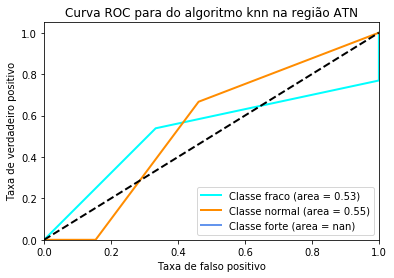

In [73]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="knn", area=region)

In [74]:
new_pred_class, classifier = test_svc(X_train,y_train, X_test)

2001 weak
2002 weak
2003 weak
2004 weak
2005 weak
2006 weak
2007 weak
2008 weak
2009 weak
2010 weak
2011 weak
2012 weak
2013 weak
2014 weak
2015 weak
2016 weak


In [75]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.8125

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


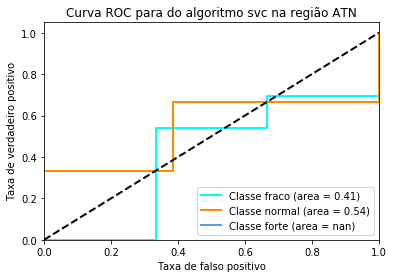

In [76]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="svc", area=region)

In [77]:
new_pred_class, classifier = test_gpc(X_train,y_train, X_test)

2001 weak
2002 normal
2003 weak
2004 weak
2005 weak
2006 weak
2007 weak
2008 weak
2009 weak
2010 weak
2011 normal
2012 weak
2013 weak
2014 weak
2015 weak
2016 weak


In [78]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.6875

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


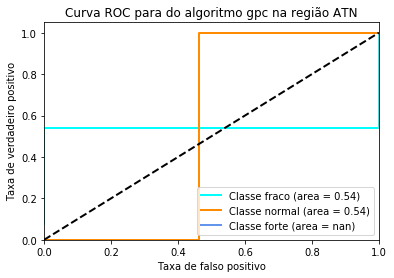

In [79]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="gpc", area=region)

In [80]:
new_pred_class, classifier = test_dtc(X_train,y_train, X_test)

2001 weak
2002 weak
2003 weak
2004 weak
2005 weak
2006 weak
2007 weak
2008 weak
2009 weak
2010 weak
2011 weak
2012 weak
2013 weak
2014 strong
2015 strong
2016 strong


In [81]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.625

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


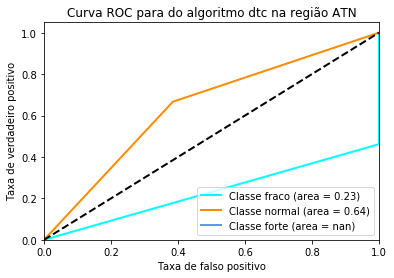

In [82]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="dtc", area=region)

In [83]:
new_pred_class, classifier = test_rfc(X_train,y_train, X_test)

2001 weak
2002 weak
2003 weak
2004 weak
2005 weak
2006 weak
2007 weak
2008 weak
2009 weak
2010 weak
2011 weak
2012 weak
2013 weak
2014 normal
2015 normal
2016 normal


In [84]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.625

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


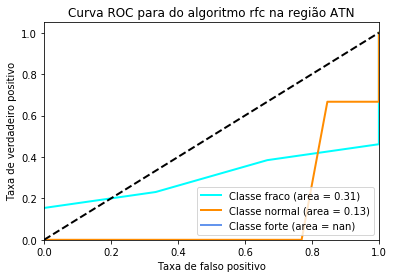

In [85]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="rfc", area=region)

In [86]:
new_pred_class, classifier = test_mlp(X_train,y_train, X_test)

2001 normal
2002 normal
2003 normal
2004 normal
2005 normal
2006 normal
2007 normal
2008 normal
2009 normal
2010 normal
2011 normal
2012 normal
2013 normal
2014 weak
2015 weak
2016 weak


In [87]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.375

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


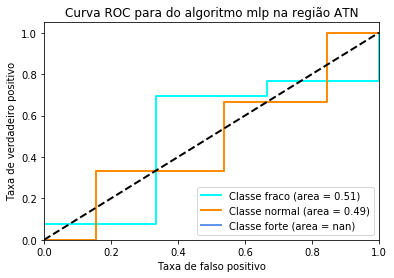

In [88]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="mlp", area=region)

In [89]:
new_pred_class, classifier = test_adc(X_train,y_train, X_test)

2001 weak
2002 weak
2003 weak
2004 weak
2005 weak
2006 weak
2007 weak
2008 normal
2009 weak
2010 weak
2011 weak
2012 weak
2013 weak
2014 strong
2015 strong
2016 strong


In [90]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.6875

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


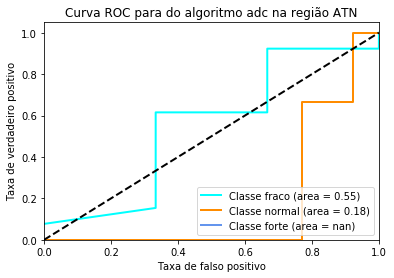

In [91]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="adc", area=region)

In [92]:
new_pred_class, classifier = test_gnb(X_train,y_train, X_test)

2001 weak
2002 weak
2003 weak
2004 weak
2005 weak
2006 weak
2007 weak
2008 weak
2009 weak
2010 weak
2011 weak
2012 weak
2013 weak
2014 weak
2015 weak
2016 weak


In [93]:
metrics.accuracy_score(test_df['classes'], new_pred_class)

0.8125

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


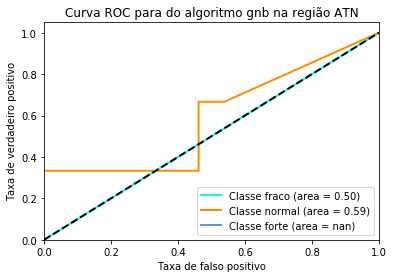

In [94]:
plot_roc(classifier, X_train, X_test, y_tr, y_tt, n_classes, algorithm="gnb", area=region)